# Convolutional Neural Networks

In this notebook, we will show an example that we will follow step by step to understand the basic concepts of convolutional networks such as:
- Kernel Size
- Padding
- Stride
- Pooling
- Flatten Layer

Convolutional Neural Networks are very similar to ordinary Neural Networks. They are made up of neurons that have learnable weights and biases. Each neuron reveices some inputs, perfom a dot product and optionally follows it with a non-linearity. So, what changes?

Convolutional networks make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. The layers of a Convulutional networks have neurons arranged in three dimensions: width, height and depth.

Example: If the input image has dimensions 32x32x3, we have an input of  32 (width) x 32 (height) x 3 (depth: Red, Green, Blue channels).

## Convolutional Layer

Intuitively, we could say that the main purpose of a convolutional layer is to detect visual features or characteristics in images. Another important feature is that convolutional layers can learn spatial hierarchies of patterns. That is, if we had a convolutional network, the first layer could learn fundamental elements like edges, the second could learn composite elements of basic elements learned in the previous layer, and so on. In general, convolutional layers operate with 3D tensors, called feature maps, with two spatial axes referring to height and width, and another axis referring to the channel/depth.

<center><img src="https://drive.google.com/uc?export=view&id=1aM4jbB-S3mQFnnQzkAOZeqpQtPi8hT1G" style="float:left; padding:0.7em" width=300/>
<figcaption style="text-align: center"><strong>Fig. 1: Schematic Diagram of a Convolutional Neural Network for Image Recognition: Decoding the 'Cat'. Source: Deep Learning with Python Book</strong></figcaption></center>




In this example, we observe an input of size 6x6, and a 6x6 feature map (output) is created. In this case, our kernel size is 3x3, referring to the dimensions of the sliding window over the input. The choice of this hyperparameter has a significant impact on image classification tasks.

For example, small kernel sizes are able to extract a much larger amount of information containing highly local features from the input. Smaller kernel size also leads to a smaller reduction in layer dimensions, which allows for a deeper architecture. Conversely, a large kernel size extracts less information, which leads to a faster reduction in layer dimensions, often leading to worse performance. Large kernels are better suited to extract features that are larger.

The kernel moves one pixel at a time in both vertical and horizontal directions, a movement known as the "stride." A larger stride leads to a smaller output size. Additionally, you can observe that the kernel shifts one position further along each axis due to the use of "padding" in the input. Padding involves adding zeros (zero-padding) around the input images, resulting in a larger output compared to not applying padding.



<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" style="width:150; float:left; padding:0.7em"/>
<figcaption style="text-align: center"><strong>Fig. 2: 2D Convolution Example. Source: https://en.m.wikipedia.org/wiki/File:2D_Convolution_Animation.gif</strong></figcaption>


## Pooling

Typically, pooling layers are used following a convolutional layer.Their primary purpose is to simplify the information gathered by the convolutional layer and create a condensed version of the contained information.

There are various ways to apply pooling, with the most common being max-pooling. Max-pooling is an operation that calculates the maximum value for patches of a feature map and uses it to create a downsampled (pooled) feature map. Max-pooling introduces a degree of translation invariance, meaning that minor translations of the image do not significantly impact the values of most pooled outputs.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png?20180226194350" style="width:150; float:left; padding:0.7em"/>
<figcaption style="text-align: center"><strong>Fig. 3: Max-pooling example. Source: https://computersciencewiki.org/index.php/File:MaxpoolSample2.png</strong></figcaption>



In [1]:
#@title Viz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, animation
from IPython.display import HTML
import ipywidgets as widget
from ipywidgets import interact


def plot_convolution(input_size, padding, kernel_size, stride):
    # Calculate the output size
    output_size = ((input_size - kernel_size + 2 * padding) // stride) + 1

    # Create the padded input matrix
    padded_input_size = input_size + 2 * padding

    # Fill the input matrix with random values and apply padding
    input_matrix = np.zeros((padded_input_size, padded_input_size))
    input_matrix[padding:padded_input_size - padding, padding:padded_input_size - padding] = np.random.rand(input_size, input_size)

    # Create the output matrix
    output_matrix = np.zeros((output_size, output_size))

    # Define a sample kernel with weights
    kernel = np.array([[0.1, 0.2, 0.1], [0.2, 0.3, 0.2], [-0.1, -0.2, -0.1]])
    if kernel_size != 3:
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
        kernel[-1] = -kernel[-1]

    vmin = -1
    vmax = 1

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Input matrix visualization
    ax[0].set_title(f"Input ({input_size}, {input_size})\nAfter-padding ({padded_input_size}, {padded_input_size})")
    im_input = ax[0].imshow(input_matrix, cmap='viridis', vmin=vmin, vmax=vmax)  # Use viridis colormap

    # Output matrix visualization
    ax[1].set_title(f"Output ({output_size}, {output_size})")
    im_output = ax[1].imshow(output_matrix, cmap='viridis', vmin=vmin, vmax=vmax)  # Use viridis colormap

    # Kernel visualization
    kernel_rect = patches.Rectangle((-0.5, -0.5), kernel_size, kernel_size, fill=False, edgecolor='red', lw=2)
    ax[0].add_patch(kernel_rect)

    # Function to update the animation
    def update(frame):
        nonlocal kernel_rect
        if frame == 0:
            return im_input, im_output, kernel_rect
        else:
            i, j = divmod(frame - 1, output_size)
            i, j = i * stride, j * stride  # Adjust index according to the stride
            if i + kernel_size <= padded_input_size and j + kernel_size <= padded_input_size:
                input_slice = input_matrix[i:i + kernel_size, j:j + kernel_size]
                output_value = np.sum(input_slice * kernel)
                output_matrix[i // stride, j // stride] = output_value
                im_output.set_data(output_matrix)

                kernel_rect.set_xy((j - 0.5, i - 0.5))
        return im_input, im_output, kernel_rect

    num_frames = output_size * output_size + 1
    ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True, repeat=False)

    plt.close(fig)
    return HTML(ani.to_jshtml())

input_size_slider = widget.IntSlider(min=1, max=20, step=1, value=4, description='Input Size')
padding_slider = widget.IntSlider(min=0, max=5, step=1, value=1, description='Padding')
kernel_size_slider = widget.IntSlider(min=1, max=7, step=1, value=2, description='Kernel Size')
stride_slider = widget.IntSlider(min=1, max=5, step=1, value=1, description='Stride')

interact(plot_convolution, input_size=input_size_slider, padding=padding_slider,
         kernel_size=kernel_size_slider, stride=stride_slider)

interactive(children=(IntSlider(value=4, description='Input Size', max=20, min=1), IntSlider(value=1, descript…

<function __main__.plot_convolution(input_size, padding, kernel_size, stride)>

# **Exercise 1: Basic Convolution Operation**

## 1) Apply a simple 2D convolution operation without padding and with a stride of 1.

Input Matrix:
$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
-1 &0 &1 \\
-2 &0 &2 \\
-1 &0 &1
\end{bmatrix}
$

Hint:

* $Output \ Size = [\frac{Input \ Size \ - \ Kernel \ Size\ +\ 2 \ \times \ Padding}{Stride}] + 1$

**Questions:**

1. What is the output matrix after applying the convolution?
2. Describe the effect of the kernel on the input image. What feature does this kernel help to detect?

1. [[3-3+2*0] /  1] + 1 =  output size = 1
Matriz de salida [8]
2. Quita un reborde de la matriz

## 2) Apply a 2D convolution operation with padding (1 layer of zero padding) and a stride of 1.

Input Matrix:
$
\begin{bmatrix}
1 &0& 2\\
3 &0& 4\\
5 &6& 0
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
0 &1& 0 \\
1 &-4& 1\\
0 &1& 0
\end{bmatrix}
$

**Questions:**

1. What is the output matrix after applying the convolution with padding?
2. How does padding affect the size of the output compared to the input?

([3 - 3 + 2 * 1] / 1) + 1  = 3 output size

\begin{bmatrix}
-1 &3& -4\\
-6 &13& -14\\
-11 &-19& 10
\end{bmatrix}


2.El relleno afecta el tamaño de la salida de tal manera que permite que la salida tenga la misma dimensión que la entrada. Sin relleno, la operación de convolución reduciría la dimensión de la matriz de salida, porque el kernel no podría aplicarse a los elementos en el borde de la matriz de entrada sin salirse de los límites. El relleno añade un borde de ceros alrededor de la matriz de entrada para que el kernel pueda aplicarse en los bordes, resultando en una matriz de salida que tiene el mismo tamaño que la matriz de entrada.

## 3) Apply a 2D convolution operation with a stride of 2 and no padding.

Input Matrix:
$
\begin{bmatrix}
1 &1& 2& 4\\
2 &2& 3& 5\\
3 &3& 1& 0\\
4 &4& 0& 0
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
1&-1\\
-1&1
\end{bmatrix}
$

**Questions:**

1. What is the output matrix after applying the convolution with a stride of 2?
2. Explain how changing the stride of the convolution affects the size and the representation of the output.

\begin{bmatrix}
0&0\\
0&1
\end{bmatrix}

Cambiar el stride de la convolución afecta el tamaño y la representación de la salida de la siguiente manera: Un paso mayor hace que el kernel se mueva más casillas sobre la matriz de entrada en cada paso, lo que reduce el número de posiciones donde el kernel se puede aplicar y, por lo tanto, disminuye el tamaño de la matriz de salida. Esto también significa que la salida representará una versión más "submuestreada" de la entrada, ya que se captura menos información local de la matriz de entrada en cada paso.


# **Exercise 2: 3D Convolution Operation**

Determine the kernel size, stride, and padding settings for two 3D convolutional layers to achieve a specific output volume size from a given input volume.

Input volume dimensions: 8x8x8 (Width x Height x Depth)

**Two convolutional layers**

Output volume dimensions: 2x2x2 (Width x Height x Depth)

Constraints:

* You may only use cubic kernels (same width, height, and depth).
* Stride must be the same in all three directions (width, height, depth).
* Use zero padding (padding with zeros around the input volume).

**Questions:**

1. What kernel size, stride, and padding settings should be used for each of the two convolutional layers to achieve the 2x2x2 output volume from the 8x8x8 input volume?
2. Is there more than one combination of settings that could achieve the target output volume? If so, provide an alternative set of parameters.

1. Kernel size: 8
Stride: 5
Padding: 5
Esto se aplicaría de la misma manera a ambas capas convolucionales. Es importante notar que esta es una de las posibles combinaciones que cumplen con las restricciones dadas y que permiten alcanzar el volumen de salida deseado.

2. Yo no he encontrado otra combinación


## 3) Practical Case

In this exercise, we will implement a convolutional network for the classification of 3D objects from the ModelNet10 dataset. For this, we will use the PyTorch library.

In [2]:
#@title Imports

!pip install trimesh
import os
import h5py
import glob
import keras
import trimesh
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

El dataset [ModelNet10](https://modelnet.cs.princeton.edu/) esta desarrollado por [Princeton Vision and Robotics Group](https://3dvision.princeton.edu/projects/2014/3DShapeNets/paper.pdf). El dataset original esta compuesto por 660 clases de objetos diferentes y 151.128 3D CAD models. La variante ModelNet10 en cambio esta compuesta por 10 clases y 4.899 CAD models

In [3]:
#@title Download Dataset
DATA_DIR = keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

In [4]:
#@title Preprocess Dataset

def parse_dataset(num_points=2048, num_classes = 4):
    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))


    for i, folder in enumerate(folders):
        if i >= num_classes:
            break

        print("processing class: {}".format(os.path.basename(folder)))
        class_map[i] = folder.split("/")[-1]
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

# Converts the continuous point cloud data into a discrete 3D array
def voxelize(points, grid_size=24):
    # Normalize points to [0, 1]
    min_bound = np.min(points, axis=1, keepdims=True)
    max_bound = np.max(points, axis=1, keepdims=True)
    points_normalized = (points - min_bound) / (max_bound - min_bound)

    # Scale to grid size
    points_scaled = np.floor(points_normalized * grid_size).astype(np.int32)
    points_scaled = np.clip(points_scaled, 0, grid_size-1)  # Ensure points are within the grid

    # Create voxel grid
    voxel_grid = np.zeros((points.shape[0], grid_size, grid_size, grid_size), dtype=np.float32)
    for i, point_set in enumerate(points_scaled):
        voxel_grid[i, point_set[:, 0], point_set[:, 1], point_set[:, 2]] = 1.0

    return voxel_grid

In [5]:
NUM_POINTS = 2048
NUM_CLASSES = 4 # Max: 10
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(NUM_POINTS, NUM_CLASSES)

# Voxelizing the point clouds
train_voxels = voxelize(train_points)
test_voxels = voxelize(test_points)

processing class: sofa
processing class: night_stand
processing class: dresser
processing class: table


The PyTorch DataLoader class is a utility class that is used to load data from a dataset and create mini-batches for training deep learning models. It is designed to handle large datasets and perform data augmentation, shuffling, and other preprocessing tasks.

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader

class PointCloudDataset(Dataset):
    def __init__(self, voxels, labels):
        self.voxels = voxels
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.voxels[idx], self.labels[idx]

# One-hot encoding the labels
train_labels_one_hot = np.eye(len(CLASS_MAP))[train_labels]
test_labels_one_hot = np.eye(len(CLASS_MAP))[test_labels]

# Creating datasets
train_dataset = PointCloudDataset(train_voxels, torch.tensor(train_labels_one_hot, dtype=torch.long))
test_dataset = PointCloudDataset(test_voxels, torch.tensor(test_labels_one_hot, dtype=torch.long))

# Creating dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### Plot sample

In [7]:
def plot_point_cloud(xyz, rgb=None, alpha=1.0):
    """Plot point cloud with alpha channel"""
    fig = go.Figure()
    fig.add_trace(
        go.Scatter3d(
            x=xyz[:, 0],
            y=xyz[:, 1],
            z=xyz[:, 2],
            mode="markers",
            marker=dict(color=rgb, size=2, opacity=alpha),
        )
    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

# plot a point cloud
plot_point_cloud(train_points[1000], alpha=0.6)

In [8]:
class Conv3DNet(nn.Module):
    def __init__(self):
        """
        Convolutional 3D Network.

        This network consists of multiple convolutional layers followed by max pooling,
        and a fully connected layer for classification.

        Attributes:
            features (nn.Sequential): Sequential module containing the convolutional layers.
            classifier (nn.Sequential): Sequential module containing the fully connected layers.
            Flatten (torch.nn.Flatten): Flatten module to flatten the input tensor.
        """
        super(Conv3DNet, self).__init__()

                                                                    # Input: [batch_size, 1, 24, 24, 24]
        self.features = nn.Sequential(
            nn.Conv3d(1, 16, kernel_size=3, stride=1, padding=0),   # Output: [batch_size, 16, 22, 22, 22]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 16, 11, 11, 11]
            nn.Conv3d(16, 32, kernel_size=3, stride=1, padding=0),  # Output: [batch_size, 32, 9, 9, 9]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 32, 4, 4, 4]
            nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=0),  # Output: [batch_size, 64, 2, 2, 2]
            nn.ReLU(),
            nn.MaxPool3d(2)                                         # Output: [batch_size, 64, 1, 1, 1]
        )

        self.classifier = nn.Sequential(
            nn.Linear(64, 512),                                     # Output: [batch_size, 512]
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, NUM_CLASSES)                             # Output: [batch_size, num_classes]
        )

        self.Flatten = torch.nn.Flatten()

    def forward(self, x):
        """
        Forward pass of the Conv3DNet.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, channels, depth, height, width).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes) after applying softmax.
        """
        x = self.features(x)
        x = self.Flatten(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

NUM_CLASSES = 10  # Example: Adjust this to your specific number of output classes

class ModifiedConv3DNet(nn.Module):
    def __init__(self):
        super(ModifiedConv3DNet, self).__init__()
        # Input: [batch_size, 1, 24, 24, 24]
        self.features = nn.Sequential(

            nn.Conv3d(1, 16, kernel_size=4, stride=1, padding=1),   # Output dimensions will be calculated
            nn.ReLU(),
            nn.MaxPool3d(2),

            nn.Conv3d(16, 32, kernel_size=2, stride=2, padding=2),  # Output dimensions will be calculated
            nn.ReLU(),
            nn.MaxPool3d(2),

            nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=0),  # Output dimensions will be calculated
            nn.ReLU(),
            nn.MaxPool3d(2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(64, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, NUM_CLASSES)
        )

        self.Flatten = torch.nn.Flatten()

    def forward(self, x):
        x = self.features(x)
        x = self.Flatten(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Conv3DNet()
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):  # number of epochs
    model.train()
    for data, target in train_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, torch.max(target, 1)[1])
        loss.backward()
        optimizer.step()
    print("Epoch: {}, Loss: {:.4f}".format(epoch, loss.item()))

Epoch: 0, Loss: 0.7452
Epoch: 1, Loss: 0.3648
Epoch: 2, Loss: 0.5064
Epoch: 3, Loss: 0.6695
Epoch: 4, Loss: 0.1522
Epoch: 5, Loss: 0.3359
Epoch: 6, Loss: 0.1446
Epoch: 7, Loss: 0.3560
Epoch: 8, Loss: 0.3064
Epoch: 9, Loss: 0.1822


In [11]:
# Create classification matrix with all test data
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for data, target in test_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.max(1, keepdim=True)[1]
        all_preds.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

# Remove one hot encoding
all_targets = np.argmax(all_targets, axis=1)
all_preds = np.array(all_preds).flatten()

In [12]:
# Plot fail cases
fail_cases = np.where(all_preds != all_targets)[0]
for i in range(3):
    idx = fail_cases[i]
    print("Predicted: {}, Target: {}".format(CLASS_MAP[all_preds[idx]], CLASS_MAP[all_targets[idx]]))
    plot_point_cloud(test_points[idx], alpha=0.6)

Predicted: table, Target: sofa


Predicted: sofa, Target: night_stand


Predicted: dresser, Target: night_stand


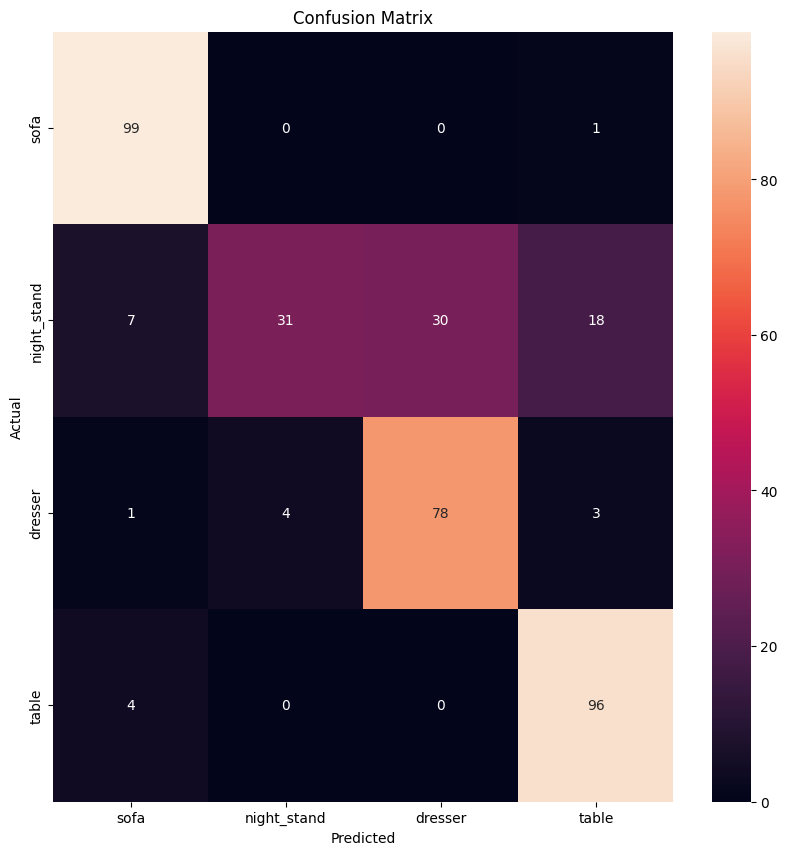

In [13]:
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_MAP.values(), yticklabels=CLASS_MAP.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Exercise

As you can see in the Conv3DNet class, comments indicating the output size for each layer have been provided. Now, use different values for kernel size, padding, and stride to generate an output with the shape [32, 128, 4, 4, 4] -> [batch_size, channels, depth, height, width]. Comment on every line with the output.

Finally, train your new network and discuss the results.

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

NUM_CLASSES = 4  # Asumiendo que este es el número de clases que tienes

class ModifiedConv3DNet(nn.Module):
    def __init__(self):
        super(ModifiedConv3DNet, self).__init__()
        # Input: [batch_size, 1, 24, 24, 24]
        self.features = nn.Sequential(
            # Primera capa convolucional para expandir el canal de 1 a 16.
            #  kernel_size de 5, stride de 1 y padding de 2 para mantener el tamaño espacial.
            nn.Conv3d(1, 16, kernel_size=5, stride=1, padding=2),   # Output: [batch_size, 16, 24, 24, 24]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),                  # Output: [batch_size, 16, 12, 12, 12]

            # Segunda capa convolucional para expandir el canal de 16 a 64.
            # kernel_size de 3, stride de 1 y padding de 1.
            nn.Conv3d(16, 64, kernel_size=3, stride=1, padding=1),  # Output: [batch_size, 64, 12, 12, 12]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),                  # Output: [batch_size, 64, 6, 6, 6]

            # Tercera capa convolucional para expandir el canal de 64 a 128.
            # kernel_size de 3, stride de 1 y padding de 1.
            nn.Conv3d(64, 128, kernel_size=3, stride=1, padding=1), # Output: [batch_size, 128, 6, 6, 6]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2)                   # Output: [batch_size, 128, 3, 3, 3]

        )

        # Ajustamos el tamaño de la entrada de la capa lineal basándonos en el volumen de salida de la última capa MaxPool.
        # Para un tamaño de salida de [batch_size, 128, 3, 3, 3], el tamaño aplanado es 128*3*3*3.
        self.classifier = nn.Sequential(
            nn.Linear(128*3*3*3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, NUM_CLASSES)                            # Output: [batch_size, NUM_CLASSES]
        )

        self.Flatten = torch.nn.Flatten()

    def forward(self, x):
        x = self.features(x)
        x = self.Flatten(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)


In [29]:
# Inicialización del modelo
model = ModifiedConv3DNet().to(device)

# Definición del optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definición de la función de pérdida
criterion = nn.CrossEntropyLoss()

# Configuración de DataLoader para los conjuntos de entrenamiento y prueba
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Ciclo de entrenamiento
num_epochs = 20  # Define el número de épocas

for epoch in range(num_epochs):
    model.train()  # Pone el modelo en modo de entrenamiento
    running_loss = 0.0

    for data, target in train_loader:
        data = data.unsqueeze(1)  # Añade la dimensión del canal
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')


Epoch 1, Loss: 0.5703213823878247
Epoch 2, Loss: 0.29742769022350724
Epoch 3, Loss: 0.2419329546391964
Epoch 4, Loss: 0.2463311068713665
Epoch 5, Loss: 0.2182562884915134
Epoch 6, Loss: 0.18771685433128607
Epoch 7, Loss: 0.1568100013486717
Epoch 8, Loss: 0.1633573954358049
Epoch 9, Loss: 0.16296647642941578
Epoch 10, Loss: 0.16077458700570074
Epoch 11, Loss: 0.1312438179941281
Epoch 12, Loss: 0.1141012036950206
Epoch 13, Loss: 0.10095829542969233
Epoch 14, Loss: 0.09950662430618769
Epoch 15, Loss: 0.09442616023285233
Epoch 16, Loss: 0.103957982207446
Epoch 17, Loss: 0.07213781870213216
Epoch 18, Loss: 0.08821132341804712
Epoch 19, Loss: 0.0820611922637276
Epoch 20, Loss: 0.06953288606651452


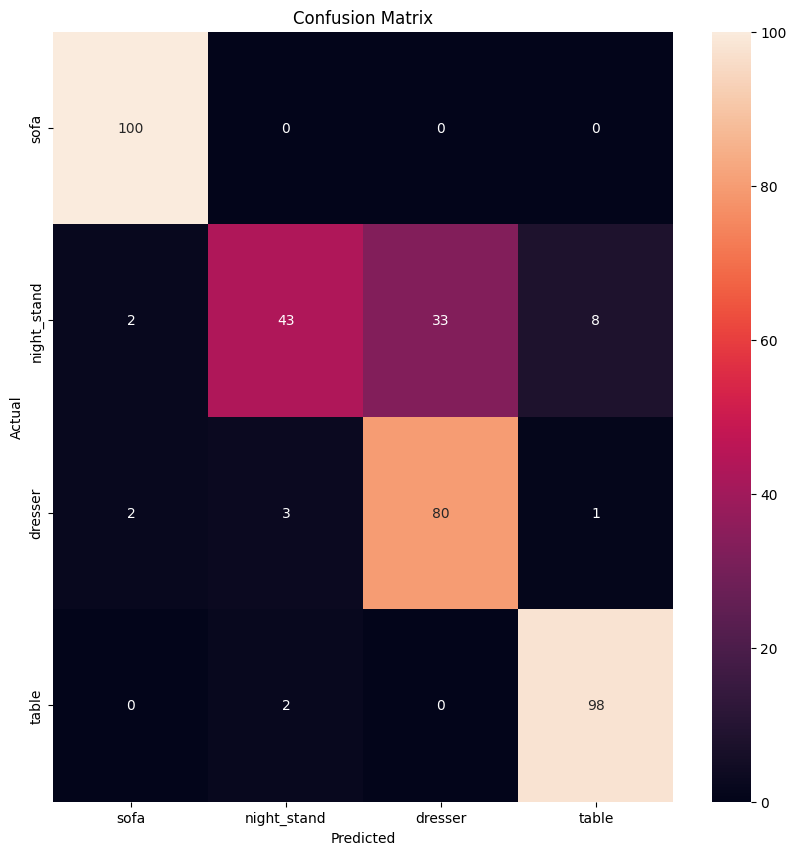

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluar el modelo en el conjunto de prueba
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for data, target in test_loader:
        data = data.unsqueeze(1)  # Ajusta la forma de los datos para incluir la dimensión del canal
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.max(1, keepdim=True)[1]  # Obtiene el índice de la clase con la probabilidad más alta
        all_preds.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

# all_targets ya debería estar en la forma correcta (índices de clase), así que el siguiente paso puede no ser necesario
# all_targets = np.argmax(all_targets, axis=1)  # Solo es necesario si `target` está one-hot encoded

all_preds = np.array(all_preds).flatten()

# Calcular la matriz de confusión
cm = confusion_matrix(all_targets, all_preds)

# Dibujar la matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_MAP.values(), yticklabels=CLASS_MAP.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Sofa: Todos los sofás han sido clasificados correctamente. No hay ninguna confusión con otras categorías, lo que indica que el modelo es muy preciso para esta clase.

Night Stand: La mayoría han sido clasificados correctamente como night_stand, pero hay una cantidad significativa de confusión con la categoría dresser, lo que indica que el modelo confunde a menudo estas dos clases. Algunos pocos han sido clasificados como table, que podría ser debido a similitudes en la estructura o forma de los objetos en las nubes de puntos.

Dresser: Aunque la mayoría de los dresser han sido clasificados correctamente, hay confusión notable con la categoría night_stand y unos pocos casos confundidos como table. Esto puede sugerir que el modelo tiene dificultades para diferenciar entre estos muebles, quizás debido a similitudes en las características de las nubes de puntos.

Table: Esta clase tiene la tasa más alta de clasificación correcta junto con sofa, y muy pocos casos fueron confundidos con night_stand o dresser.